In [ ]:
!pip install netCDF4
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 48.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import pandas as pd
from datetime import datetime
drive.mount('/content/drive')
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Data Visualization/Data_EX1.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#EX1 (4 points):

Please download the file **Data_EX1.txt** here https://drive.google.com/file/d/17HIftj9hevOsFTe4WkZ1zWNtTKVlI4dH/view?usp=drive_link

In this file, the first line show the year of the observation. Then, each row is the number of days in months, from days 1 to days 31, each column is a month, from January to December.

In short, we have daily value of an observation from 01 Jan 2009 to 31 Dec 2009. value = -99 and 99 mean that they are the missing values. Remove it.

1. Plot the monthly mean of the temperature in 2009
2. Show the monthly mean values in the plot



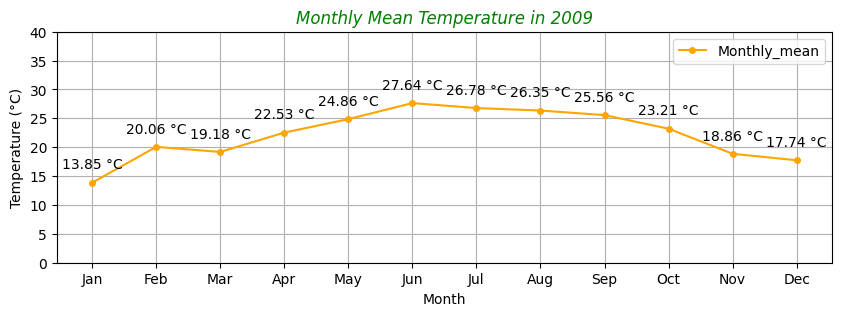

In [ ]:
#----#----#----#----#----#----#
# EX1: Basic text processing and line plot
#----#----#----#----#----#----#

from numpy import *
from datetime import *

#put your code here
import matplotlib.pyplot as plt
import numpy as np
with open(file_path, 'r') as file:
    lines = file.readlines()
temperature_data = []
for line in lines[1:]:
    data = line.strip().split()
    temperature_data.extend([float(temp) if temp != '-99.0' else None for temp in data[1:]])
monthly_means = []
for i in range(12):
    month_temperatures = [temp for temp in temperature_data[i::12] if temp is not None]
    monthly_mean = np.mean(month_temperatures)  # Calculate mean
    monthly_means.append(monthly_mean)
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 3))
plt.plot(month_labels, monthly_means, marker='.', markersize=8, linestyle='-', color='#ffa500')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend(['Monthly_mean'])
plt.title('Monthly Mean Temperature in 2009', color='Green',fontstyle='italic')
plt.ylim(0, 40)
plt.grid()
for i, mean_value in enumerate(monthly_means):
    plt.annotate(f'{mean_value:.2f} °C', (month_labels[i], mean_value), textcoords="offset points", xytext=(0, 10), ha='center')

plt.savefig('/content/drive/MyDrive/Figure1_2.png')
plt.show()



---

---

#EX2 (3 points):
Using the same file as excercise 1. **Draw the contour and heatmap of temperature in 2009**



First column removed and saved to your_output_file.txt


<ipython-input-34-e5bfac0d8ac6>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  contour = plt.contourf(X, Y, data_transposed, cmap=plt.cm.get_cmap('jet',32), levels=np.arange(custom_vmin, custom_vmax,2),extend="both")


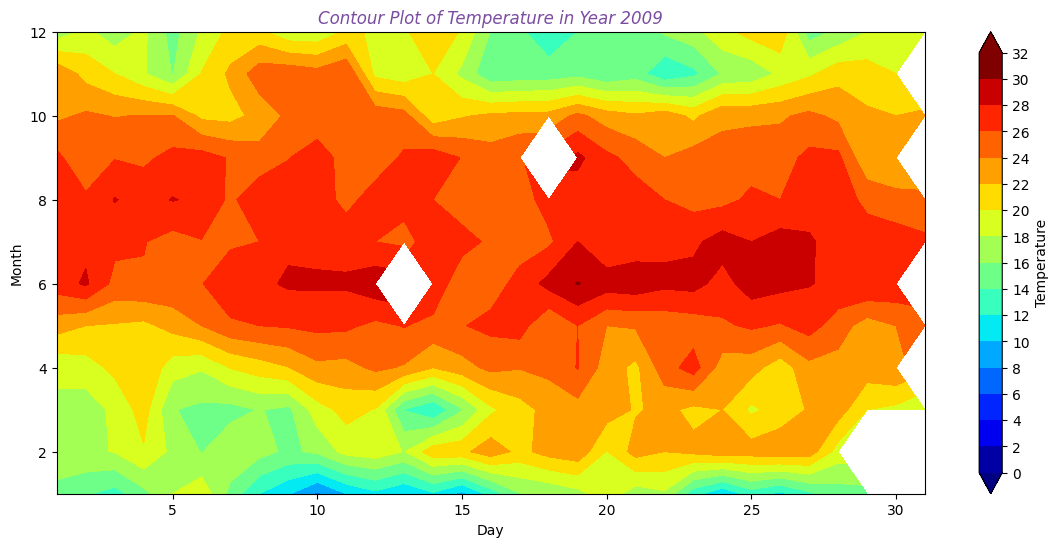

In [ ]:
#----#----#----#----#----#----#
# EX2: Contour and heatmap
#----#----#----#----#----#----#
# Specify the path to your output text file
output_file_path = "your_output_file.txt"

# Read the input file, remove the first column, and write to the output file
with open(file_path, 'r') as input_file, open(output_file_path, 'w') as output_file:
    for line in input_file:
        # Split the line by whitespace (assuming columns are separated by spaces)
        columns = line.split()

        # Exclude the first column (index 0) and join the remaining columns back into a line
        modified_line = ' '.join(columns[1:])

        # Write the modified line to the output file
        output_file.write(modified_line + '\n')

print("First column removed and saved to", output_file_path)

custom_vmin = 0
custom_vmax = 34
ticks=np.arange(custom_vmin, custom_vmax, 2)
data = np.genfromtxt(output_file_path, skip_header=0)  # Change skip_header if needed

# Replace any -99.0 values with NaN
data[data == -99.0] = np.nan
data_transposed = data.T


# Create X and Y coordinates for the rotated contour plot
y = np.arange(1, 13)  # Months on the y-axis
x = np.arange(1, 32)  # Temperature on the x-axis
X, Y = np.meshgrid(x, y)

# Create the rotated contour plot
plt.figure(figsize=(14, 6))

contour = plt.contourf(X, Y, data_transposed, cmap=plt.cm.get_cmap('jet',32), levels=np.arange(custom_vmin, custom_vmax,2),extend="both")
cbar = plt.colorbar(contour, label='Temperature', ticks=np.arange(custom_vmin, custom_vmax,2))
plt.title('Contour Plot of Temperature in Year 2009',fontstyle='italic',fontsize=12,color='#7a4da2')
plt.xlabel('Day')
plt.ylabel('Month')
plt.show()








<ipython-input-74-1e14b0da0f00>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.pcolormesh(X,Y, data_transposed, cmap=plt.cm.get_cmap('jet', 33),norm=norm)


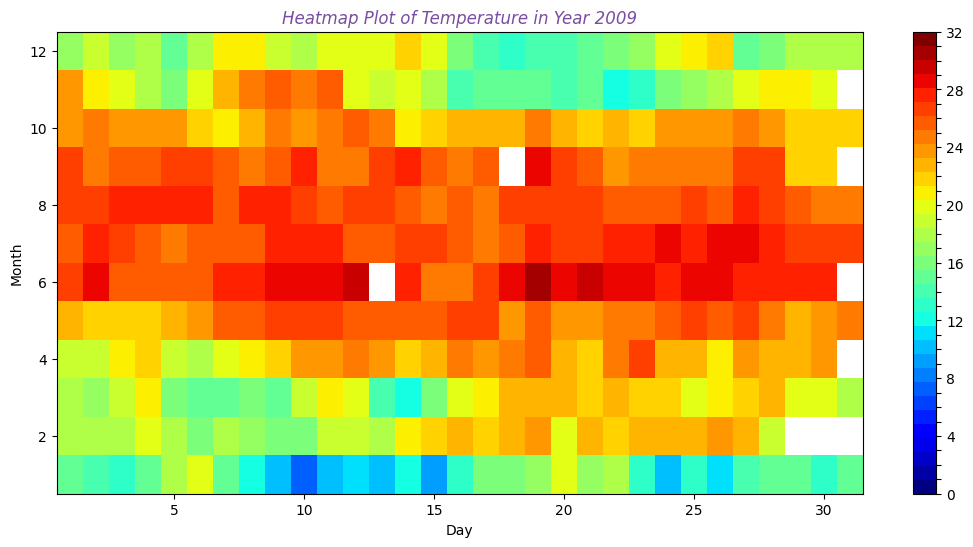

In [ ]:
#subplot 2
num_levels = 33
ticks=np.arange(0,33)
norm = plt.Normalize(0, num_levels - 1)
plt.figure(figsize=(13, 6))
plt.pcolormesh(X,Y, data_transposed, cmap=plt.cm.get_cmap('jet', 33),norm=norm)
cbar1=plt.colorbar(ticks=np.arange(0, 33))
tick_labels=[str(tick) if tick %4 ==0 else '' for tick in ticks]
cbar1.ax.set_yticklabels(tick_labels)
plt.xlabel('Day')
plt.ylabel('Month')
plt.title('Heatmap Plot of Temperature in Year 2009',fontstyle='italic',fontsize=12,color='#7a4da2')
plt.subplots_adjust( wspace = 0.2)
plt.show()

---

---

#EX3 (3 points):

Using the same input file as excercise 1. Draw the boxplot for 12 months



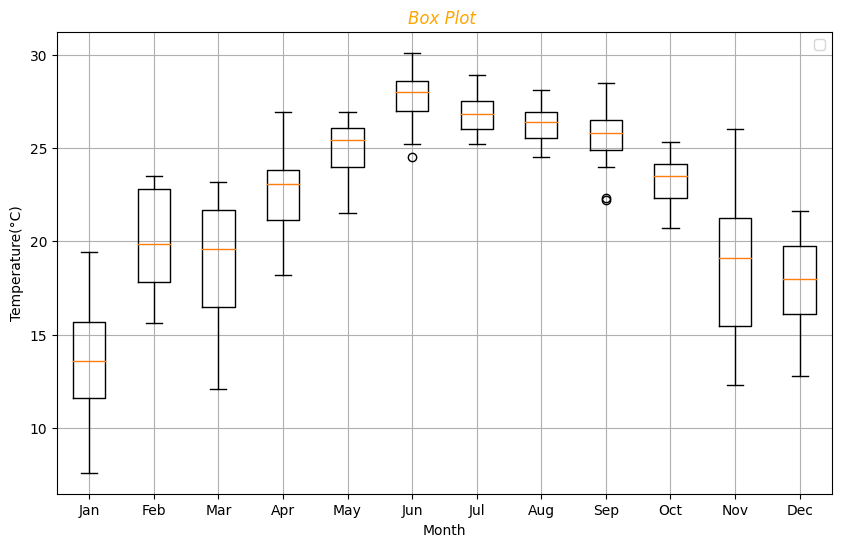

In [ ]:
#----#----#----#----#----#----#
# EX3: Advanced text processing and line plot
#----#----#----#----#----#----#
#--------------------------#
#2. Box plot
#--------------------------#
temp_data=[]
for line in lines[1:]:
  data=line.strip().split()
  temp_data.extend(float(temp) if temp!='-99.0' else None for temp in data[1:])

year_temps=[]
for i in range(12):
  monthly_temp=[temp for temp in temp_data[i::12] if temp is not None]
  year_temps.append(monthly_temp)
group_labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.figure(figsize=(10, 6))
plt.boxplot(year_temps, labels=group_labels)
plt.legend()
plt.title('Box Plot ',fontstyle='oblique',color='orange')
plt.xlabel('Month')
plt.ylabel('Temperature(°C)')
plt.grid()

plt.show()


---

---


#EX4 (4 points):

We have 800 stations below. Plot only the station inside Vietnam. Counts the number of station inside Vietnam.

![link text](https://i.imgur.com/WStTU1l.png)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-36-0b44d216d206>:43: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf_points_within_vietnam = gpd.sjoin(gdf_points, gdf1, op='within')


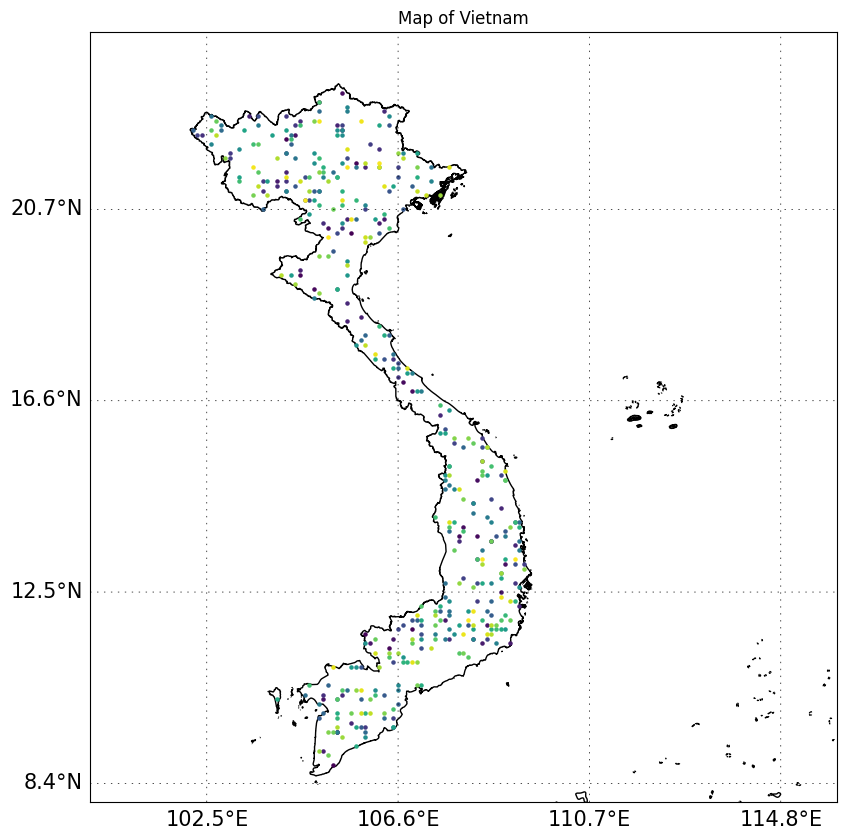

In [ ]:
#----#----#----#----#----#----#
# EX4: shapefile processing...
#----#----#----#----#----#----#
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import shapefile
import matplotlib.patches as patches
import matplotlib.path as mplp

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

random.seed(seed=180793)

x_location = random.randint (1020, 1100, 2000)/10
y_location = random.randint (80, 240, 2000)/10

#----#----#----#----#----#----#
#Put your code after this line
#----#----#----#----#----#----#
vietnam_province_path='/content/drive/MyDrive/Data Visualization/VNM_shp/gadm41_VNM_1.shp'
vietnam_province_path1='/content/drive/MyDrive/Data Visualization/VNM_shp/gadm41_VNM_0.shp'
island_path='/content/drive/MyDrive/Data Visualization/Islands/haidao'
lon_min = 100
lon_max = 116
lat_min = 8
lat_max = 24.5
colors = np.random.rand(800)
gdf1 = gpd.read_file(vietnam_province_path1)
fig, ax = plt.subplots(figsize=(10, 10))
gdf1.plot(ax=ax, color='white', edgecolor='k')
gdf_points = gpd.GeoDataFrame(geometry=gpd.points_from_xy(x_location, y_location))
ax.set_title("Map of Vietnam")
map1 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)
parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1)) 	#lat
meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
map1.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map1.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map1.readshapefile(island_path, 'haidao',linewidth=1, color='k')
gdf_points_within_vietnam = gpd.sjoin(gdf_points, gdf1, op='within')

num_points = len(gdf_points_within_vietnam)
colors = plt.cm.viridis(np.linspace(0, 1, num_points))

# Plot the filtered points with unique colors
for i, color in enumerate(colors):
    gdf_points_within_vietnam.iloc[[i]].plot(ax=ax, marker='o', color=color, markersize=5)

plt.show()





---

---

In [ ]:
num_points_visualized = len(gdf_points_within_vietnam)
print(f"Number of points visualized: {num_points_visualized}")


Number of points visualized: 438


#EX5 (3 points):

Imagine that you are a business man, and you sell 3 kinds of fruit: apple, banana, and durian :)))

You have 10 stores. Now, you want to know which store sell the most, which month sell the most, and which fruit sell the most.

1. Use Pie chart, Draw the pie plot for 12 months, 10 stores. The radius of the pie chart is proportional to the total sale.

For example, if  
* < 40: radi = 0.1
* < 60:   radi = 0.3
* < 80:   radi = 0.5
* < 100:  radi = 0.7
* More than 100: radi = 1.


2. Which store sell the most?

![link text](https://i.imgur.com/4vOkn08.png)

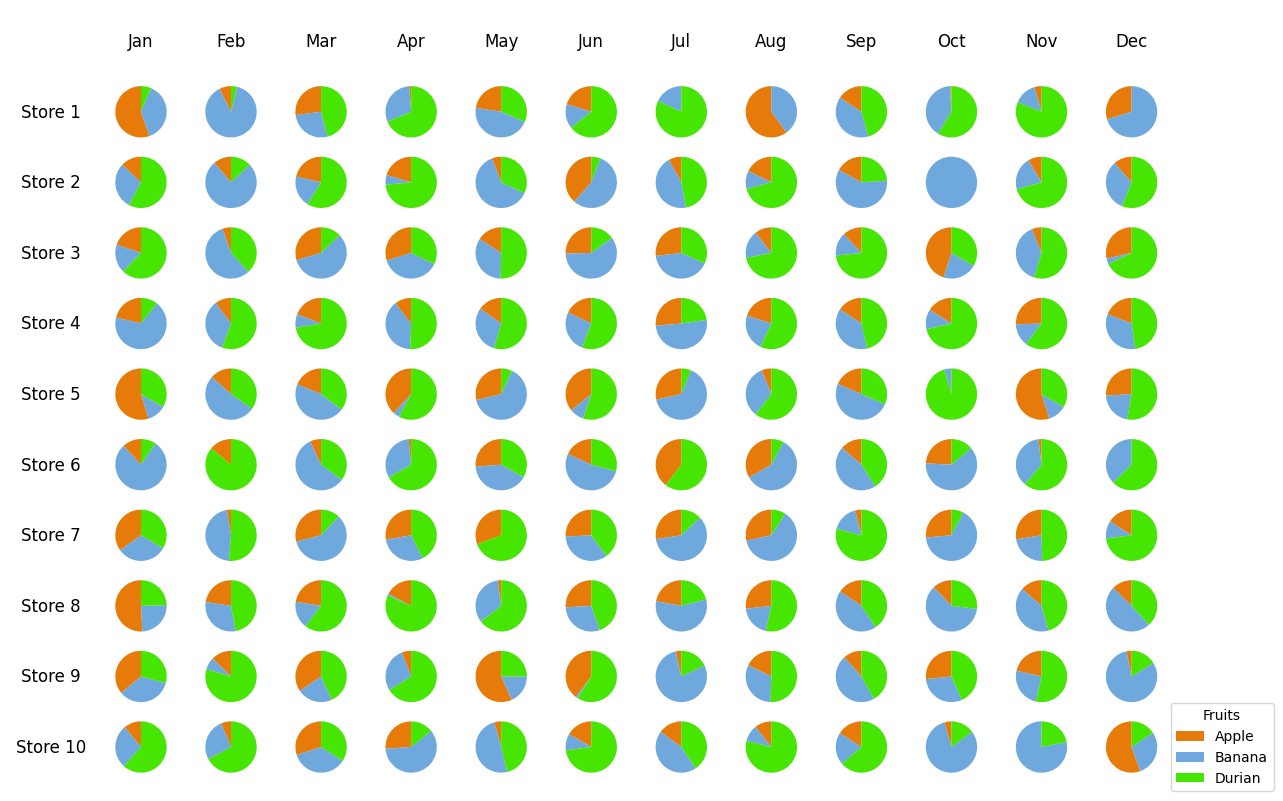

In [ ]:
#----#----#----#----#----#----#
# EX5: Pie chart and customized plot
#----#----#----#----#----#----#
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

np.random.seed(seed=180793)
apple = np.random.randint(0, 30, size=(10, 12))  # 10 stores, 12 months
banana = np.random.randint(0, 60, size=(10, 12))  # 10 stores, 12 months
durian = np.random.randint(0, 80, size=(10, 12))  # 10 stores, 12 months
#----#----#----#----#----#----#
#Put your code after this line
#----#----#----#----#----#----#
def plot_pie_chart(ax, data):
    total_sales = data.sum()
    proportions = data / total_sales

    # Define the radius based on proportion to total sales
    if total_sales < 0.4:
        radius = 0.1
    elif total_sales < 0.6:
        radius = 0.3
    elif total_sales < 0.8:
        radius = 0.5
    elif total_sales < 1.0:
        radius = 0.7
    else:
        radius = 1.0

    # Plot the pie chart without labels and with a legend
    wedges, _, _ = ax.pie(proportions, radius=radius, colors=['#e77b0a', '#6fa8dc', '#47e502'], autopct='',
                          startangle=90)

    return wedges

fig = plt.figure(figsize=(15, 10))
gs = GridSpec(11, 13, figure=fig, wspace=0.1, hspace=0.1)

# Fill the subplots with pie charts and collect legend handles
legend_handles = []
for i in range(0,11):
    for j in range(13):
        if j == 0:  # Add store names on the first column
            ax = fig.add_subplot(gs[i, j])
            if i==0:
              ax.text(0.5, 0.5, f"", fontsize=12, ha='center', va='center')
            else:
              ax.text(0.5, 0.5, f"Store {i}", fontsize=12, ha='center', va='center')
            ax.axis('off')
        elif i == 0:  # Add month names on the first row
            ax = fig.add_subplot(gs[i, j])
            month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            ax.text(0.5, 0.5, month_names[j-1], fontsize=12, ha='center', va='center')
            ax.axis('off')
        else:
            ax = fig.add_subplot(gs[i, j])
            data = np.array([apple[i-1, j-1], banana[i-1, j-1], durian[i-1, j-1]])
            wedges = plot_pie_chart(ax, data)

            # Collect handles for legend
            if i == 1 and j == 1:
                legend_handles = wedges
labels = ['Apple', 'Banana', 'Durian']
plt.legend(legend_handles, labels, title="Fruits", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()


In [ ]:
total_sales_by_store = np.sum(apple + banana + durian, axis=1)

# Find the store with the highest total sales
store_with_highest_sales = np.argmax(total_sales_by_store)

print(f"Store {store_with_highest_sales + 1} sells the most.")

Store 4 sells the most.


---

---

#EX6 (3 points):


**ENSO**

We have an index called Nino3.4 that quantifies ENSO (El Niño-Southern Oscillation).
Nino3.4 is calculated using SST (sea surface temperature) anomalies averged over the area from 5S-5N and 170-120W in the Tropical Pacific.

***Nino3.4 of a month = Area average over [5S-5N and 170-120W] of (SST of this month minus mean SST over a long period (e.g. 30 years))***

When it is large and positive, we say there is an El Nino. When it is large and negative, we say there is a La Nina. In between, we say it is neutral.

**SST**

We will use the SST Monthly Data located in: https://drive.google.com/file/d/10vJE9bbwkPCqjLtZNTC0nPQ7IPgtNJjy/view?usp=share_link

**Defining El Nino, La Nina, and Neutral**

Nino3.4 >= 1 -> El Nino

Nino3.4 <= -1 -> La Nina

Nino3.4 > -1 and Nino3.4 < 1 -> Neutral



Draw the Nino3.4 index.

![link text](https://i.imgur.com/aVO5dz2.png)

Now, we would like to know more about the precipitation during the different ENSO phase.
# **Precipitation Data**

We will use the Global Precipitation Climatology Project (GPCP) Monthly Precipitation Data located in:

https://drive.google.com/file/d/10BO4_IqyBERHfWCSoBrL-y6nTpQJq-Sh/view?usp=share_link

Draw the precipitation anomaly during the different ENSO phase.
![link text](https://i.imgur.com/8nqwh1U.png)

**Then, plot the two maps, showing the difference between the precipitation between the El Nino and La Nina with the Neutral phase.**
![link text](https://i.imgur.com/n3orJmB.png)

In [ ]:
#----#----#----#----#----#----#
# EX6.3: PUT YOUR CODE HERE
#----#----#----#----#----#----#
















# **Calculate Significance Using the built-in Stats Function**

**State our problem clearly**

Where is the mean difference different enough to be considered significant (meaning its unlikely it happened by random chance)?

 = El Nino Composite (=59)

 = Neutral Composite (=394)

**Define our Null Hypothesis**

Null Hypothesis (H0): Differences between the two means is zero


**Pick a level of significance**

Pick a p-value (or level of significance). Typically, 1% or 5% is chosen.


**Draw the same map as above, then mark where its significant**
![link text](https://i.imgur.com/nRApOCj.png)


In [ ]:
#----#----#----#----#----#----#
# EX6.4: PUT YOUR CODE HERE
#----#----#----#----#----#----#














